In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [5]:
df = pd.read_csv("personality.csv")
df

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4
...,...,...,...,...,...,...,...,...
135,XabiAlonso,35.569389,22.133740,38.904885,31.624351,12.201221,47.5420,7
136,XaviRodriguez,31.960417,15.416979,48.533125,40.096458,11.764583,47.5625,4
137,xoellopez,71.696129,12.489274,27.571210,19.093548,3.241935,74.3065,2
138,ZacEfron,51.537405,26.009695,36.465344,23.008168,7.284962,118.6107,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc8d229f890>,
      dtype=object)

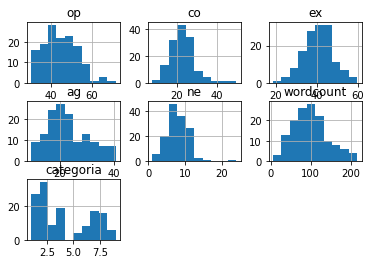

In [8]:
df.hist()

In [9]:
df.shape

(140, 8)

In [10]:
df.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


### Selección de los datos para 2D

In [45]:
df2 = df.iloc[:,0:6]
df2

,op,co,ex,ag,ne,wordcount
0,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945
1,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970
2,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604
3,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538
4,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645
...,...,...,...,...,...,...
135,35.569389,22.133740,38.904885,31.624351,12.201221,47.5420
136,31.960417,15.416979,48.533125,40.096458,11.764583,47.5625
137,71.696129,12.489274,27.571210,19.093548,3.241935,74.3065
138,51.537405,26.009695,36.465344,23.008168,7.284962,118.6107


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc8cdc2f450>,
      dtype=object)

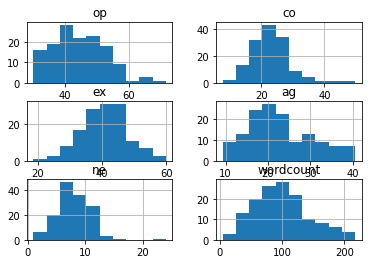

In [46]:
df2.hist()

In [47]:
df2.columns

Index(['op', 'co', 'ex', 'ag', 'ne', 'wordcount'], dtype='object')

### Normalización de los datos

In [48]:
scaler = MinMaxScaler()

In [51]:
scale =scaler.fit_transform(df2)

In [52]:
df_scale = pd.DataFrame(scale, columns = df2.columns)
df_scale

,op,co,ex,ag,ne,wordcount
0,0.102638,0.485725,0.565391,0.641501,0.383967,0.151175
1,0.359116,0.303292,0.467902,0.478723,0.406663,0.347735
2,0.281061,0.141023,0.493696,0.810161,0.340190,0.208518
3,0.248507,0.180081,0.817966,0.696232,0.174393,0.355544
4,0.159427,0.282146,0.725415,0.698045,0.273474,0.198168
...,...,...,...,...,...,...
135,0.133145,0.341772,0.491386,0.713567,0.486791,0.200418
136,0.046549,0.181027,0.725471,0.984439,0.467764,0.200515
137,1.000000,0.110961,0.215837,0.312930,0.096379,0.326569
138,0.516295,0.434531,0.432075,0.438089,0.272559,0.535391


## Revisión con PCA

In [33]:
from sklearn.decomposition import PCA

In [53]:
pca = PCA()

In [54]:
pca.fit(df_scale)

PCA()

In [55]:
pca.explained_variance_

array([0.111063  , 0.03731464, 0.02367315, 0.01903433, 0.01250286,
       0.00907381])

In [56]:
pca.explained_variance_ratio_

array([0.5222518 , 0.17546472, 0.11131832, 0.08950516, 0.0587922 ,
       0.0426678 ])

### Varianza de los datos

In [100]:
pca_summary_df = pd.DataFrame({"Proporción de la varianza": pca.explained_variance_ratio_, "Propoción acumulada":np.cumsum(pca.explained_variance_ratio_)})
pca_summary_df

,Proporción de la varianza,Propoción acumulada
0,0.522252,0.522252
1,0.175465,0.697717
2,0.111318,0.809035
3,0.089505,0.898540
4,0.058792,0.957332
5,0.042668,1.000000


In [101]:
pca_summary_df = pca_summary_df.transpose()
pca_summary_df

,0,1,2,3,4,5
Proporción de la varianza,0.522252,0.175465,0.111318,0.089505,0.058792,0.042668
Propoción acumulada,0.522252,0.697717,0.809035,0.898540,0.957332,1.000000


In [ ]:
pca_summary_df.columns = ["PC" + str(pc) for pc in range(1, len(pca_summary_df.columns) + 1)]
pca_summary_df

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
components = np.arange(pca.n_components_) + 1
variance = pca.explained_variance_ratio_

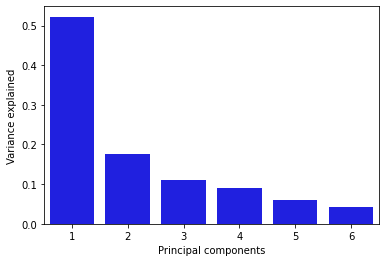

In [58]:
sns.barplot(x=components, y=variance, color="b")
plt.xlabel("Principal components")
plt.ylabel("Variance explained")
plt.show()

In [61]:
pca_components_df = pd.DataFrame(pca.components_.transpose(),
                                columns=components,
                                index=df2.columns)

In [62]:
pca_components_df

,1,2,3,4,5,6
op,0.484299,0.420821,-0.326657,0.348770,0.178034,-0.572995
co,0.219794,-0.203610,0.400867,-0.092680,-0.719639,-0.472302
ex,-0.362414,-0.022745,-0.515507,-0.645528,-0.025982,-0.430127
ag,-0.668259,-0.196232,-0.074479,0.643643,-0.076975,-0.298620
ne,-0.000326,-0.319884,0.512423,-0.150084,0.665511,-0.411906
wordcount,0.373135,-0.800064,-0.445790,0.127525,0.030317,0.068971


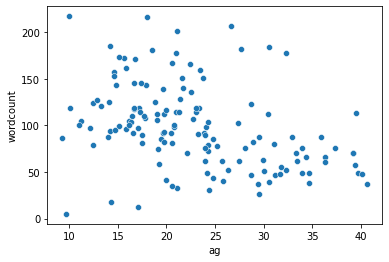

In [63]:
sns.scatterplot(x='ag',y='wordcount', data = df2)

### KMEANS

In [74]:
df3 = df2.iloc[:,[3,5]]
df3

,ag,wordcount
0,29.370315,37.0945
1,24.279098,78.7970
2,34.645521,49.2604
3,31.082154,80.4538
4,31.138871,47.0645
...,...,...
135,31.624351,47.5420
136,40.096458,47.5625
137,19.093548,74.3065
138,23.008168,118.6107


In [75]:
km = KMeans(n_clusters=2)

In [76]:
km.fit_predict(df3)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0], dtype=int32)

In [77]:
km.cluster_centers_

array([[ 19.79997256, 143.54774815],
       [ 24.87669063,  70.56499186]])

In [79]:
df3["Clusters"] = km.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [80]:
df3.columns

Index(['ag', 'wordcount', 'Clusters'], dtype='object')

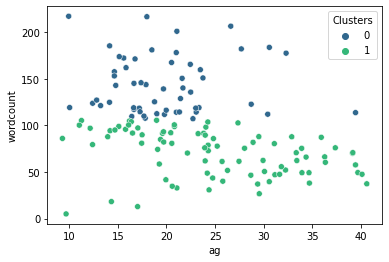

In [82]:
sns.scatterplot(x='ag', y= 'wordcount',hue='Clusters' ,data=df3, palette= "viridis")

### Método del codo para encontrar número de clusters

In [86]:
K =range (2,10)
inertias =[]
for i in K:
  kmeans =KMeans(n_clusters=i)
  kmeans.fit(df3)
  inertias. append(kmeans.inertia_)

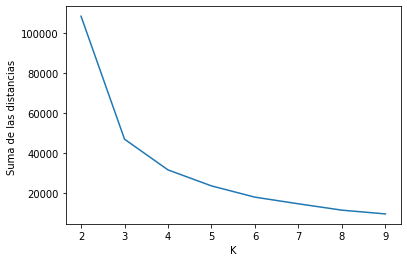

In [87]:
plt.plot(K, inertias)
plt.xlabel ("K")
plt.ylabel("Suma de las distancias ")
plt.show()

### KMeans despues del método del codo

In [89]:
kmeans =KMeans(n_clusters=3)
kmeans.fit(df3)

KMeans(n_clusters=3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


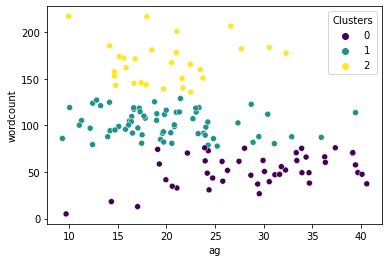

In [90]:
df3["Clusters"] = kmeans.labels_
sns.scatterplot(x='ag', y= 'wordcount',hue='Clusters' ,data=df3, palette= "viridis")

In [91]:
df.groupby('Clusters').count()

,op,co,ex,ag,ne,wordcount,categoria
Clusters,,,,,,,
0,88,88,88,88,88,88,88
1,52,52,52,52,52,52,52


### Dendogramas

In [96]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [97]:
linkage_data = linkage(df_scale, method='centroid', metric='euclidean')

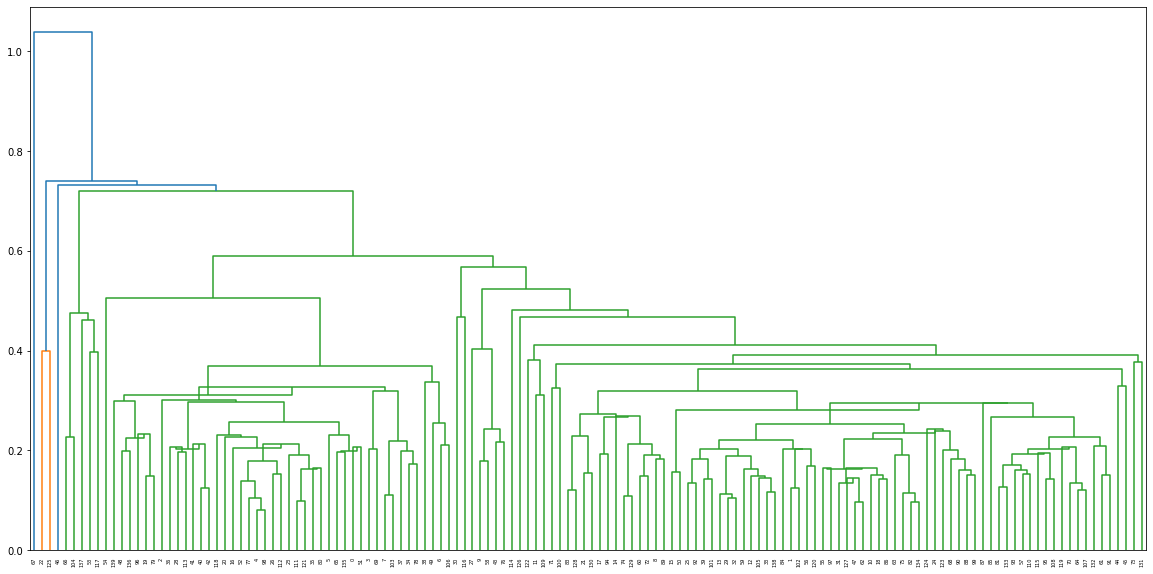

In [98]:
plt.figure(figsize=(20,10))
dendrogram(linkage_data)
plt.show()

Basado en tu modelo responde las siguientes preguntas

* **¿Por qué es necesario normalizar los datos?** 
Para que queden alrededor de los mismos rangos y veamos menos datos atípicos.

* **¿Cuántos componentes se usaron y que variables tienen mayor importancia?**

Se utilizaron 2 variables, en este caso las que vimos más relevantes en el análisis del PCA: ag y wordcount.

* **¿Qué información da la gráfica "Elbow plot"?**

Nos ayuda a saber el número de agrupaciones ideales para nuestro clustering dependiendo de las distancias graficadas de las variables escogidas.

* **¿Crees que los resultados serían diferentes si descartas variables?**

Los resultados si podrian llegar a ser diferentes, ya que las distribuciones cambiarian. Pero se tendrán variables con orden de importancia igual, obviamente quitando del orden las variables

* **Interpreta por lo menos 2 clusters explicando similitudes o diferencias de personalidad.**

(ver la grafica anexada abajo)

1. Podemos observar que los 3 clusters se dividen entre rangos de conteo de palabras y estan dispersos entre la variable de "ag", el grado de empatía.

2. Análizando el cluster 1 y 2, podemos ver que ambos grupos de datos se ladean a un menor grado de empatía (ag)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


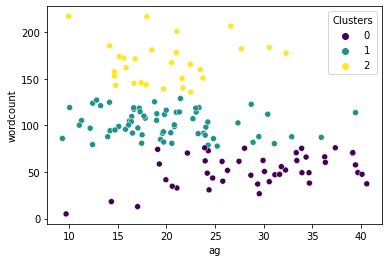

In [99]:
df3["Clusters"] = kmeans.labels_
sns.scatterplot(x='ag', y= 'wordcount',hue='Clusters' ,data=df3, palette= "viridis")